- *Name :* *Smruti Sonekar*
- *Branch :* *TY CSE DS*
- *UID :* *2021700064*
- *EXP NO :* *5*
- *Topic :* *Implement k-NN algorithm*

- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on - Supervised Learning technique.
- K-NN algorithm assumes the similarity between the new case/data and available cases and - put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the - similarity. This means when new data appears then it can be easily classified into a well - suite category by using K- NN algorithm.
- K-NN algorithm can be used for Regression as well as for Classification but mostly it is - used for the Classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on - underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training - set immediately instead it stores the dataset and at the time of classification, it - performs an action on the dataset.
- KNN algorithm at the training phase just stores the dataset and when it gets new data, - then it classifies that data into a category that is much similar to the new data.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [101]:
df1=pd.DataFrame(pd.read_csv("./files/Best Shows Netflix.csv"))
df1.sample(5)

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
197,197,Alice in Borderland,2020,7.6,47651,47,2,action,JP
219,219,Love 101,2020,7.5,13797,46,2,comedy,TR
64,64,The Legend of Korra,2012,8.4,117464,23,4,action,US
25,25,One-Punch Man,2015,8.7,148386,24,2,action,JP
10,10,Cowboy Bebop,1998,8.9,112887,25,1,western,JP


KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.

In [102]:
df1.dtypes

index                  int64
TITLE                 object
RELEASE_YEAR           int64
SCORE                float64
NUMBER_OF_VOTES        int64
DURATION               int64
NUMBER_OF_SEASONS      int64
MAIN_GENRE            object
MAIN_PRODUCTION       object
dtype: object

In [103]:
df1.isna().sum()

index                0
TITLE                0
RELEASE_YEAR         0
SCORE                0
NUMBER_OF_VOTES      0
DURATION             0
NUMBER_OF_SEASONS    0
MAIN_GENRE           0
MAIN_PRODUCTION      0
dtype: int64

In [104]:
df1.drop_duplicates()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,4,The Last Dance,2020,9.1,108321,50,1,documentary,US
...,...,...,...,...,...,...,...,...,...
241,241,Evil Genius,2018,7.5,27516,48,1,crime,US
242,242,13 Reasons Why,2017,7.5,282373,58,4,drama,US
243,243,Lupin,2021,7.5,100575,46,3,crime,FR
244,244,All of Us Are Dead,2022,7.5,41393,61,1,action,KR


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

(K-NN) algorithm is a versatile and widely used machine learning algorithm that is primarily used for its simplicity and ease of implementation. It does not require any assumptions about the underlying data distribution. It can also handle both numerical and categorical data, making it a flexible choice for various types of datasets in classification and regression tasks. It is a non-parametric method that makes predictions based on the similarity of data points in a given dataset. K-NN is less sensitive to outliers compared to other algorithms.

The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data.

In [106]:
df1.sample(3)

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
128,128,Comedians in Cars Getting Coffee,2012,8.0,12363,20,11,comedy,US
170,170,Crazy Ex-Girlfriend,2015,7.8,19738,42,4,comedy,US
174,174,Undercover,2019,7.8,16773,49,3,drama,BE


In [107]:
df1.drop(columns='index',inplace=True)

In [108]:
df1.sort_values(by='SCORE',ascending=False)

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,Kota Factory,2019,9.3,66985,42,2,drama,IN
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
4,The Last Dance,2020,9.1,108321,50,1,documentary,US
...,...,...,...,...,...,...,...,...
222,Blue Exorcist,2011,7.5,12741,24,2,scifi,JP
221,Reign,2013,7.5,47751,42,4,drama,US
220,Shooter,2016,7.5,35547,41,3,war,US
219,Love 101,2020,7.5,13797,46,2,comedy,TR


<Axes: xlabel='MAIN_GENRE'>

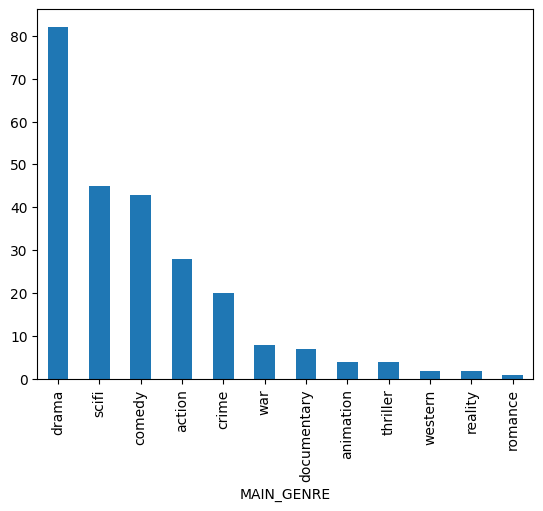

In [109]:
df1['MAIN_GENRE'].value_counts().plot(kind='bar')

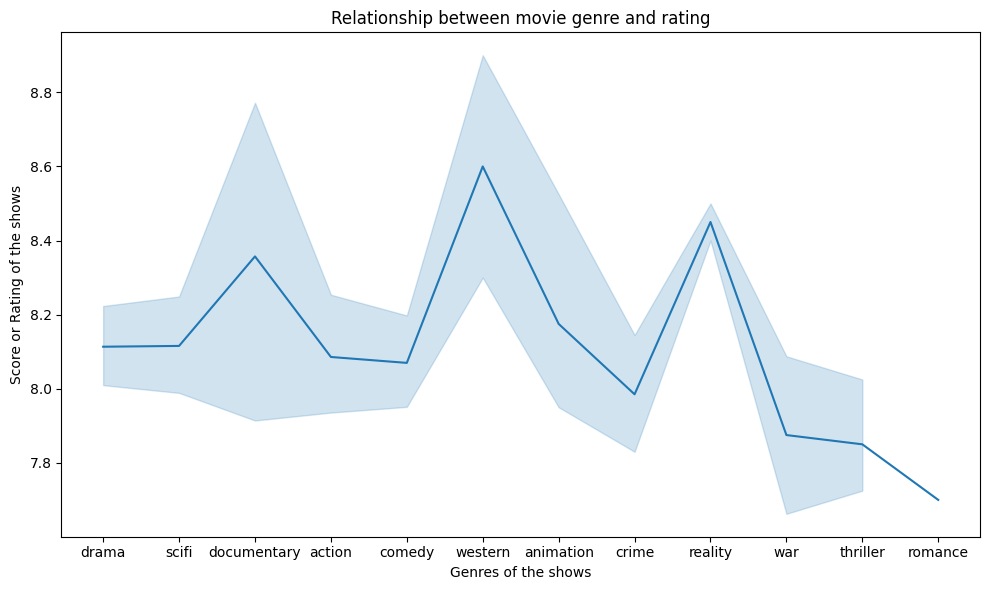

In [110]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df1,x='MAIN_GENRE',y='SCORE')
plt.xlabel('Genres of the shows')
plt.ylabel('Score or Rating of the shows')
plt.title('Relationship between movie genre and rating')
plt.tight_layout()
plt.show()

In [111]:
X=df1[['SCORE','DURATION','NUMBER_OF_SEASONS']]
y=df1['MAIN_GENRE']

In [112]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [113]:
X_train.shape,X_test.shape

((172, 3), (74, 3))

In [114]:
y_train.shape,y_test.shape


((172,), (74,))

In [115]:
X_train

,SCORE,DURATION,NUMBER_OF_SEASONS
29,8.7,58,6
124,8.0,31,2
115,8.1,59,7
84,8.3,25,7
5,9.1,41,1
...,...,...,...
106,8.1,26,3
14,8.8,26,6
92,8.2,29,4
179,7.7,26,1


In [116]:
k = 3# Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)


In [117]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [118]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [120]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.2972972972972973
Precision: 0.2768412045585959
Recall: 0.2972972972972973
F1 Score: 0.28046229075640844
Confusion Matrix:
 [[3 0 2 1 0 2 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0]
 [3 1 6 0 0 5 0 1 0 0 0]
 [2 0 1 3 0 3 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0]
 [1 0 1 2 2 8 0 2 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [3 2 2 1 0 3 0 2 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
y1=knn.predict([[9,55,1]])
y1[0]

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'action'

In [122]:
y2=knn.predict([[8.1,26,3]])
y2[0]

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'drama'

Disadvantages of the KNN Algorithm
- Does not scale – As we have heard about this that the KNN algorithm is also considered a Lazy Algorithm. The main significance of - this term is that this takes lots of computing power as well as data storage. This makes this algorithm both time-consuming and - resource exhausting.
- Curse of Dimensionality – There is a term known as the peaking phenomenon according to this the KNN algorithm is affected by the - curse of dimensionality which implies the algorithm faces a hard time classifying the data points properly when the dimensionality is - too high.
- Prone to Overfitting – As the algorithm is affected due to the curse of dimensionality it is prone to the problem of overfitting as well. Hence generally feature selection as well as dimensionality reduction techniques are applied to deal with this problem.

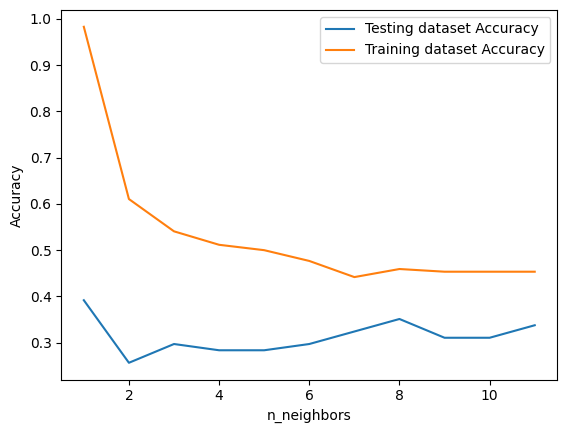

In [123]:
neighbors = np.arange(1, 12) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

**So here, neighbours are knn neigbouring value, so when no of neighbours=1 then training accuracy is higher than test accuracy , as we increase the no of neigbours, test accuracy increases and training accuracy decreases**

**NOW WE WILL The process of standardisation THE DATA AS ACCURACY IS VERY LESS**
We have 12 generes

In [124]:
df1['MAIN_GENRE'].value_counts()

MAIN_GENRE
drama          82
scifi          45
comedy         43
action         28
crime          20
war             8
documentary     7
animation       4
thriller        4
western         2
reality         2
romance         1
Name: count, dtype: int64

**Now we will drop the show genres which are less than 20 , so that we have limited classes**

In [125]:
df2=df1
genres_to_delete = ['war', 'documentary', 'animation', 'thriller', 'western', 'reality', 'romance']

# Delete rows corresponding to the specified genres
df_filtered = df2[~df2['MAIN_GENRE'].isin(genres_to_delete)]

In [126]:
df_filtered

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
3,Kota Factory,2019,9.3,66985,42,2,drama,IN
5,Arcane,2021,9.1,175412,41,1,action,US
6,Attack on Titan,2013,9.0,325381,24,4,scifi,JP
...,...,...,...,...,...,...,...,...
241,Evil Genius,2018,7.5,27516,48,1,crime,US
242,13 Reasons Why,2017,7.5,282373,58,4,drama,US
243,Lupin,2021,7.5,100575,46,3,crime,FR
244,All of Us Are Dead,2022,7.5,41393,61,1,action,KR


<Axes: >

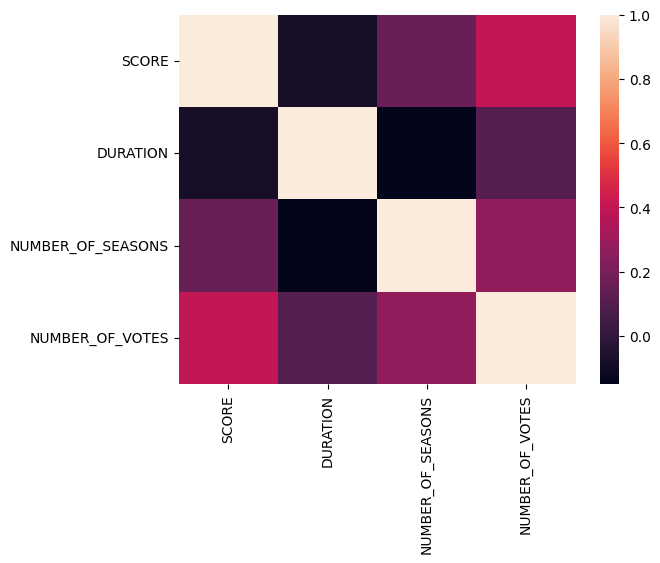

In [127]:
X2=df_filtered[['SCORE','DURATION','NUMBER_OF_SEASONS','NUMBER_OF_VOTES']]
c=X2.corr()
sns.heatmap(c)

As from heatmap , we will drop no of votes column as it is higly correlating with other columns which can cause multicollienarity 

In [128]:
X1=df_filtered[['SCORE','DURATION','NUMBER_OF_SEASONS']]
y1=df_filtered['MAIN_GENRE']

In [129]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [130]:
X_train1.shape,X_test1.shape

((152, 3), (66, 3))

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train1)

# transform train and test sets
X_train_scaled = scaler.transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

In [132]:
X_train1

,SCORE,DURATION,NUMBER_OF_SEASONS
91,8.2,62,2
71,8.4,56,3
158,7.8,24,5
209,7.6,42,8
35,8.6,31,5
...,...,...,...
120,8.0,62,1
17,8.8,52,3
102,8.2,46,11
204,7.6,44,5


In [133]:
X_train_scaled

array([[ 0.20850421,  1.29130757, -0.54894074],
       [ 0.64264995,  0.90993694, -0.24217974],
       [-0.65978729, -1.12403975,  0.37134227],
       [-1.09393303,  0.02007214,  1.29162528],
       [ 1.0767957 , -0.67910735,  0.37134227],
       [ 1.51094145, -1.31472507, -0.24217974],
       [ 1.0767957 ,  0.7828134 ,  2.21190829],
       [ 1.0767957 ,  0.71925163, -0.54894074],
       [ 0.85972283, -1.06047798,  0.37134227],
       [-0.87686016,  0.02007214,  1.29162528],
       [-0.22564154,  0.7828134 , -0.54894074],
       [-0.65978729, -1.31472507, -0.24217974],
       [ 0.64264995,  0.14719568,  3.43895231],
       [-0.44271441,  0.97349871, -0.24217974],
       [-1.09393303,  0.21075745, -0.85570175],
       [ 0.42557708, -1.06047798,  0.98486428],
       [ 0.85972283,  0.90993694,  2.21190829],
       [-1.31100591,  0.08363391, -0.54894074],
       [ 0.42557708, -1.2511633 ,  0.37134227],
       [-0.44271441,  0.59212808, -0.24217974],
       [ 1.29386857, -1.12403975, -0.242

Standardization, also known as feature scaling, is an essential preprocessing step in many machine learning algorithms. It involves transforming the features of a dataset so that they have a mean of 0 and a standard deviation of 1.

Helps Gradient Descent Converge Faster: In optimization algorithms like gradient descent, feature scaling can help the algorithm converge more quickly. Features with larger scales can cause the optimization process to take longer to converge because the updates to the weights associated with those features will be larger. Standardizing the features puts them on a similar scale, which can speed up convergence.

Improves Performance of Distance-Based Algorithms: Algorithms that rely on distance measures, such as k-Nearest Neighbors (kNN) and Support Vector Machines (SVM), can be sensitive to the scale of the features. Without standardization, features with larger scales may dominate the distance calculations, leading to biased results. Standardizing the features ensures that each feature contributes equally to the distance calculations, resulting in more accurate predictions.

Regularization: In algorithms that use regularization techniques like Ridge Regression or Lasso Regression, standardization can be important for ensuring that all features are penalized equally. Without standardization, the regularization penalties may unfairly penalize features with larger scales.

In [134]:
k1 = 3 # Number of neighbors to consider
knn1 = KNeighborsClassifier(n_neighbors=k1)

In [135]:
knn1.fit(X_train_scaled, y_train1)

KNeighborsClassifier(n_neighbors=3)

In [136]:
# Predict on the test set
y_pred1 = knn1.predict(X_test_scaled)

In [137]:
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.3181818181818182


In [138]:
df1.head(1)

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US


In [139]:
#Now we will predict what will be the genre of show of Breaking Bad
s=9.5
d=48
#v=1727694	
s1=5
y1=knn1.predict([[s,d,s1]])
y1[0]

'drama'

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [141]:
accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='weighted')
recall = recall_score(y_test1, y_pred1, average='weighted')
f1 = f1_score(y_test1, y_pred1, average='weighted')
conf_matrix = confusion_matrix(y_test1, y_pred1)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.3181818181818182
Precision: 0.36167122351332875
Recall: 0.3181818181818182
F1 Score: 0.31788539743085203
Confusion Matrix:
 [[ 3  2  0  4  0]
 [ 2  5  0  0  1]
 [ 1  1  1  3  0]
 [ 2  8  4 10  5]
 [ 4  4  2  2  2]]


**We had 12 categories the last time, so our accuracy score was 0.29 and the data was not scaled either. Therefore, in order to improve accuracy, we only looked at genres with a value count above 20, so we are now only looking at drama, sci-fi, comedy, action, and crime. Additionally, we are performing standardisation to equalise the distance calculation, so our accuracy score is now improved to 0.318, which is better than before.**

Applications of the KNN Algorithm
- Data Preprocessing – While dealing with any Machine Learning problem we first perform the EDA part in which if we find that the data - contains missing values then there are multiple imputation methods are available as well. One of such method is KNN Imputer which is - quite effective ad generally used for sophisticated imputation methodologies.
- Pattern Recognition – KNN algorithms work very well if you have trained a KNN algorithm using the MNIST dataset and then performed - the evaluation process then you must have come across the fact that the accuracy is too high.
- Recommendation Engines – The main task which is performed by a KNN algorithm is to assign a new query point to a pre-existed group - that has been created using a huge corpus of datasets. This is exactly what is required in the recommender systems to assign each - user to a particular group and then provide them recommendations based on that group’s preferences.

**CONCLUSION**:
*Through this experiment, we gained a deeper understanding of how the k-NN algorithm works and its practical application in classifying TV shows based on their attributes. We successfully evaluated the classifier's performance using various evaluation metrics and made accurate predictions about the genres of the TV shows*